Load DataSet

In [17]:
import pandas as pd

file_path = 'StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


REQUIREMENT 1: Data Cleaning & Basic Visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

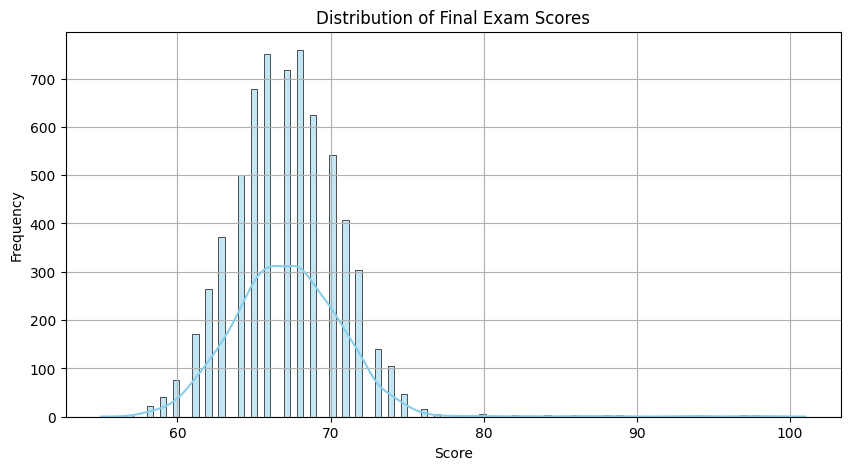

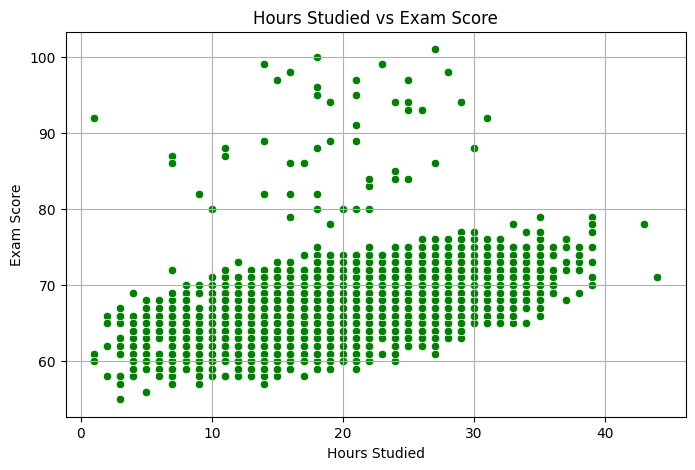

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistical summary:\n", df.describe())
plt.figure(figsize=(10,5))
sns.histplot(df['Exam_Score'], kde=True, color='skyblue')
plt.title('Distribution of Final Exam Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.figure(figsize=(8,5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, color='green')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

REQUIREMENT 2: Split the Dataset

In [19]:
from sklearn.model_selection import train_test_split

X = df[['Hours_Studied']]
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5285, 1)
X_test shape: (1322, 1)
y_train shape: (5285,)
y_test shape: (1322,)


REQUIREMENT 3: Train Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Model Intercept:", lr.intercept_)
print("Model Coefficient:", lr.coef_)
y_pred = lr.predict(X_test)

Model Intercept: 61.51116746904424
Model Coefficient: [0.28566874]


REQUIREMENT 4: Visualize Predictions & Evaluate Model

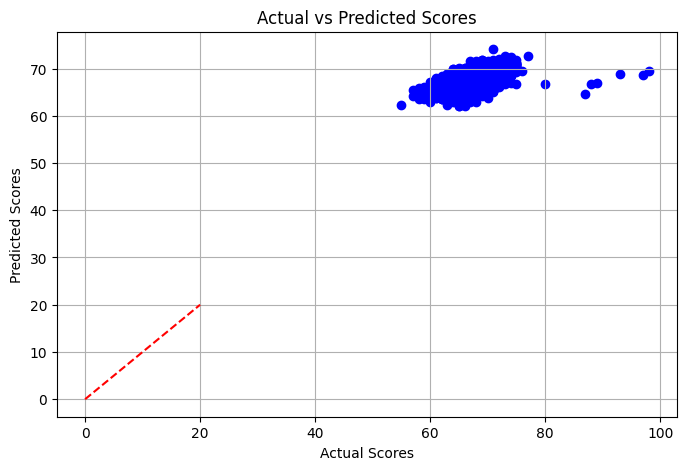

Mean Absolute Error: 2.4475687452945643
Mean Squared Error: 10.85592128879332
R² Score: 0.2319868674542106


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.plot([0, 20], [0, 20], '--', color='red')
plt.grid(True)
plt.show()
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

BONUS 1: Polynomial Regression

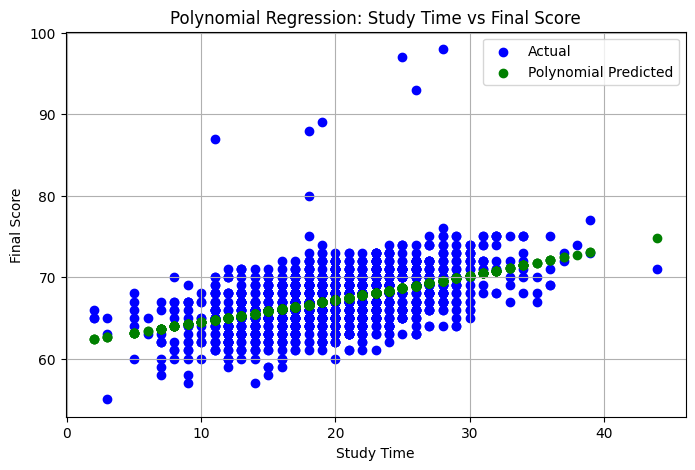

Poly MAE: 2.4447795821288105
Poly MSE: 10.84498813570501
Poly R²: 0.23276034442853466


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, poly_pred, color='green', label='Polynomial Predicted')
plt.title('Polynomial Regression: Study Time vs Final Score')
plt.xlabel('Study Time')
plt.ylabel('Final Score')
plt.legend()
plt.grid(True)
plt.show()
print("Poly MAE:", mean_absolute_error(y_test, poly_pred))
print("Poly MSE:", mean_squared_error(y_test, poly_pred))
print("Poly R²:", r2_score(y_test, poly_pred))

BONUS 2: Try Different Feature Combinations

In [14]:
print(df.columns.tolist())

['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

base_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Physical_Activity']
X = df[base_features].copy()
X = pd.concat([X, pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)], axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
multi_model_cat = LinearRegression()
multi_model_cat.fit(X_train, y_train)
multi_pred_cat = multi_model_cat.predict(X_test)
print("Multi-feature (+Gender) MAE:", mean_absolute_error(y_test, multi_pred_cat))
print("Multi-feature (+Gender) MSE:", mean_squared_error(y_test, multi_pred_cat))
print("Multi-feature (+Gender) R²:", r2_score(y_test, multi_pred_cat))

Multi-feature (+Gender) MAE: 1.3521538814238
Multi-feature (+Gender) MSE: 5.325705409510313
Multi-feature (+Gender) R²: 0.6232275837522478
